# Forecasting Assignment Instructions

Build a prophet model to predict the hourly data in the week (monday-sunday) of Waitangi Day in 2018. You can use as little or as much data as you like (so start from 2012, or 2014 or something else, you choose).

Visualise the results by making a plot like we do in class (model predictions, true values, uncertainty) AND quantify the results by calculating RMSE, MAE and MAPE. Implement the formulas yourself for these performance stats and do not use a package or library for this.

Interpret your results: write what you think of the performance, does your model work or not. Should it not work, give an explanation why.

In [4]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import os

from prophet import Prophet
import holidays

import matplotlib.pyplot as plt

# Exploratory Data Cleaning

In [6]:
dataframe_2010 = pd.read_csv("cycling_Auckland/cycling_counts_2010.txt")
dataframe_2011 = pd.read_csv("cycling_Auckland/cycling_counts_2011.txt")
dataframe_2012 = pd.read_csv("cycling_Auckland/cycling_counts_2012.txt")
dataframe_2013 = pd.read_csv("cycling_Auckland/cycling_counts_2013.txt")
dataframe_2014 = pd.read_csv("cycling_Auckland/cycling_counts_2014.txt")
dataframe_2015 = pd.read_csv("cycling_Auckland/cycling_counts_2015.txt")
dataframe_2016 = pd.read_csv("cycling_Auckland/cycling_counts_2016.txt")
dataframe_2017 = pd.read_csv("cycling_Auckland/cycling_counts_2017.txt")
dataframe_2018 = pd.read_csv("cycling_Auckland/cycling_counts_2018.txt")

In [7]:
dataframes = [dataframe_2010, dataframe_2011, dataframe_2012, dataframe_2013, dataframe_2014, dataframe_2015, dataframe_2016, dataframe_2017, dataframe_2018]

In [15]:
dataframe = pd.concat(dataframes)
dataframe

,datetime,Beach Road,Carlton Gore Cycle Counter,Curran Street Road,Curran Street Shared Path,Dominion Rd City Bound,Dominion Road Outbound,East Coast Road,GI TO TAMAKI DR SECTION-1,Grafton Bridge,...,Symonds Street City Bound,Symonds Street Sth Bound,Tamaki Drive EB,Tamaki Drive WB,TeWero Bridge Bike Counter,Twin Streams,Upper Queen Street,Victoria Street West On Rd,Victoria Street West Shared Path,Waterview Unitec Counter
0,2010-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-07-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-07-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,2018-07-31 19:00:00,6.0,13.0,0.0,6.0,3.0,15.0,3.0,1.0,29.0,...,12.0,10.0,26.0,8.0,32.0,1.0,12.0,2.0,2.0,2.0
5084,2018-07-31 20:00:00,5.0,8.0,1.0,6.0,2.0,5.0,1.0,1.0,15.0,...,5.0,7.0,15.0,6.0,13.0,0.0,2.0,0.0,3.0,1.0
5085,2018-07-31 21:00:00,5.0,2.0,0.0,2.0,1.0,6.0,2.0,0.0,8.0,...,7.0,7.0,6.0,3.0,9.0,0.0,4.0,0.0,1.0,2.0
5086,2018-07-31 22:00:00,1.0,3.0,0.0,1.0,1.0,4.0,0.0,0.0,10.0,...,4.0,3.0,7.0,2.0,6.0,0.0,4.0,0.0,2.0,3.0


In [16]:
dataframe = dataframe[['datetime', 'Tamaki Drive EB']]
dataframe

,datetime,Tamaki Drive EB
0,2010-07-01 00:00:00,2.0
1,2010-07-01 01:00:00,3.0
2,2010-07-01 02:00:00,1.0
3,2010-07-01 03:00:00,1.0
4,2010-07-01 04:00:00,2.0
...,...,...
5083,2018-07-31 19:00:00,26.0
5084,2018-07-31 20:00:00,15.0
5085,2018-07-31 21:00:00,6.0
5086,2018-07-31 22:00:00,7.0


In [17]:
dataframe.columns = ['ds', 'y'] #or dataframe.rename(columns = {"datetime":"ds", "Tamaki Drive EB":"y"}, inplace=True)
dataframe = dataframe[dataframe['ds'] >= "2015"].reset_index(drop = True)
dataframe

,ds,y
0,2015-01-01 00:00:00,1.0
1,2015-01-01 01:00:00,4.0
2,2015-01-01 02:00:00,1.0
3,2015-01-01 03:00:00,1.0
4,2015-01-01 04:00:00,1.0
...,...,...
31387,2018-07-31 19:00:00,26.0
31388,2018-07-31 20:00:00,15.0
31389,2018-07-31 21:00:00,6.0
31390,2018-07-31 22:00:00,7.0


# Prophet Forecasting

In [18]:
train = dataframe[dataframe['ds'] < '2018-01-01']
test = dataframe[dataframe['ds'] >= '2018-01-01']

print(train.tail())
print(test.head())

                        ds     y
26299  2017-12-31 19:00:00  17.0
26300  2017-12-31 20:00:00  19.0
26301  2017-12-31 21:00:00   6.0
26302  2017-12-31 22:00:00   3.0
26303  2017-12-31 23:00:00  11.0
                        ds     y
26304  2018-01-01 00:00:00  10.0
26305  2018-01-01 01:00:00   8.0
26306  2018-01-01 02:00:00   1.0
26307  2018-01-01 03:00:00   3.0
26308  2018-01-01 04:00:00   1.0


In [19]:
m = Prophet(weekly_seasonality=7*12)
m.fit(train)

21:27:12 - cmdstanpy - INFO - Chain [1] start processing
21:27:44 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
days = test.shape[0]
future = m.make_future_dataframe(periods = days, freq='H')
future

,ds
0,2015-01-01 00:00:00
1,2015-01-01 01:00:00
2,2015-01-01 02:00:00
3,2015-01-01 03:00:00
4,2015-01-01 04:00:00
...,...
31387,2018-07-31 19:00:00
31388,2018-07-31 20:00:00
31389,2018-07-31 21:00:00
31390,2018-07-31 22:00:00


In [21]:
forecast = m.predict(future)
forecast['truth'] = dataframe['y']
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,truth
0,2015-01-01 00:00:00,30.858589,-19.943222,21.688391,30.858589,30.858589,-28.882411,-28.882411,-28.882411,-10.902785,...,-17.750739,-17.750739,-0.228888,-0.228888,-0.228888,0.0,0.0,0.0,1.976178,1.0
1,2015-01-01 01:00:00,30.857301,-19.706515,22.850053,30.857301,30.857301,-29.502936,-29.502936,-29.502936,-13.279992,...,-16.010788,-16.010788,-0.212155,-0.212155,-0.212155,0.0,0.0,0.0,1.354365,4.0
2,2015-01-01 02:00:00,30.856013,-18.954831,22.300509,30.856013,30.856013,-30.314378,-30.314378,-30.314378,-17.619192,...,-12.499896,-12.499896,-0.195289,-0.195289,-0.195289,0.0,0.0,0.0,0.541636,1.0
3,2015-01-01 03:00:00,30.854726,-21.752825,21.571920,30.854726,30.854726,-30.501375,-30.501375,-30.501375,-19.093118,...,-11.229966,-11.229966,-0.178291,-0.178291,-0.178291,0.0,0.0,0.0,0.353351,1.0
4,2015-01-01 04:00:00,30.853438,-19.528490,21.439008,30.853438,30.853438,-29.917553,-29.917553,-29.917553,-14.353884,...,-15.402509,-15.402509,-0.161159,-0.161159,-0.161159,0.0,0.0,0.0,0.935885,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31387,2018-07-31 19:00:00,41.264758,17.622158,58.839959,38.703972,43.718624,-2.623060,-2.623060,-2.623060,4.841586,...,0.913355,0.913355,-8.378002,-8.378002,-8.378002,0.0,0.0,0.0,38.641698,26.0
31388,2018-07-31 20:00:00,41.265605,-1.082784,42.225187,38.703965,43.719832,-21.599717,-21.599717,-21.599717,-7.122548,...,-6.103321,-6.103321,-8.373848,-8.373848,-8.373848,0.0,0.0,0.0,19.665888,15.0
31389,2018-07-31 21:00:00,41.266452,-8.413032,33.361352,38.703959,43.721040,-28.704628,-28.704628,-28.704628,-14.598788,...,-5.736178,-5.736178,-8.369663,-8.369663,-8.369663,0.0,0.0,0.0,12.561824,6.0
31390,2018-07-31 22:00:00,41.267300,-13.216764,30.257680,38.703952,43.722248,-32.783986,-32.783986,-32.783986,-15.435044,...,-8.983497,-8.983497,-8.365445,-8.365445,-8.365445,0.0,0.0,0.0,8.483314,7.0


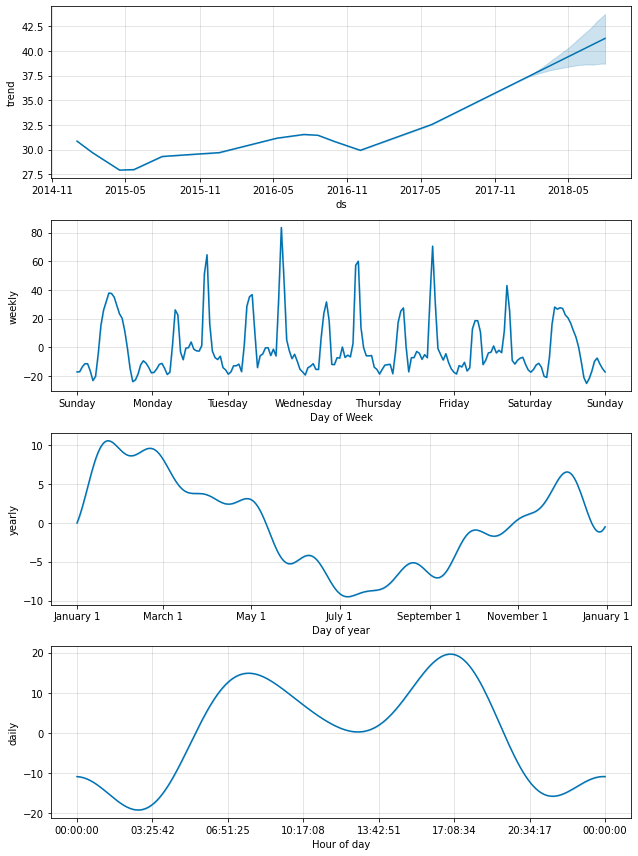

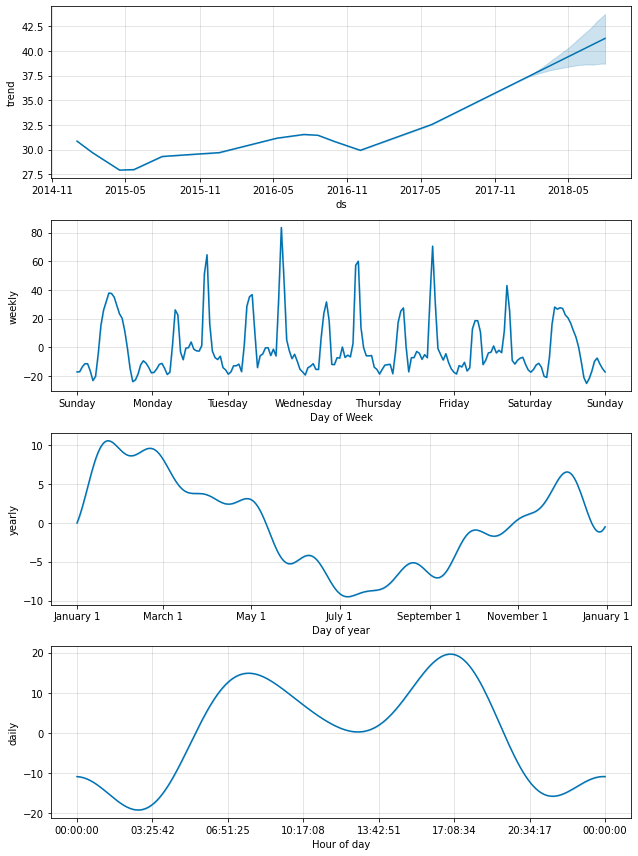

In [22]:
m.plot_components(forecast)

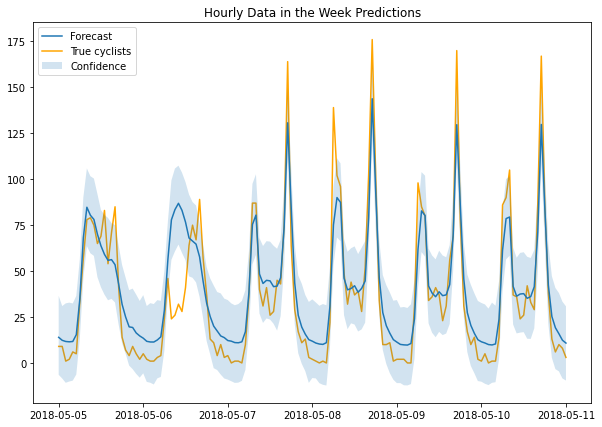

In [72]:
forecast_plot = forecast[np.logical_and(forecast['ds'] >= '2018-05-05', forecast['ds'] <= '2018-05-11' )]

plt.figure(figsize = (10,7))
plt.plot(forecast_plot['ds'], forecast_plot['yhat'], label='Forecast', zorder = 1)
plt.plot(forecast_plot['ds'], forecast_plot['truth'], label='True cyclists', zorder = 0, color = 'orange')                                                                                       
plt.fill_between(forecast_plot['ds'], forecast_plot['yhat_upper'], forecast_plot['yhat_lower'],
                 alpha=.2, label='Confidence')
plt.title('Hourly Data in the Week Predictions')
plt.legend()
plt.show()

# Test Forecasting - RMSE, MAE, MAPE

In [73]:
test_forecast = forecast.loc[forecast["ds"] >= "2018-01-01"]

In [74]:
RMSE = np.sqrt(sum(np.square(test_forecast['yhat'] - test_forecast['truth']))/len(test_forecast['yhat']))
RMSE

21.00149471843139

In [57]:
test_truth = test_forecast[test_forecast["truth"] > 0]

MAPE = (test_truth["truth"] - test_forecast["yhat"]) / test_truth["truth"]
MAPE = MAPE.abs().sum() / len(MAPE)
print("MAPE test: " + "{:.2f}".format(100 * MAPE) + "%")

MAPE test: 177.27%


In [61]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

test_true = test_forecast["truth"].to_numpy()
test_forecasts = test_forecast["yhat"].to_numpy()

print(mae(test_true, test_forecasts))

15.131766141191493


# Interpretations

## RMSE

RMSE is 21, which is on the same scale as the observed data values.


## MAPE

MAPE shows the error values in percentages, so 177% of MAPE means that the actual and predicted values are off by 177%.

## MAE

The MAE is 15, meaning that there's 15 values difference between the actual and forecasted values on average. MAE value of 15 is a poor prediction especially with the fact that the predictions ranges from -11 to 151